# Credit Risk Modelling
Build a model to predict personal probability of default(PD), Loss given Default (LGD) and Explosure at Default (EAD) using **Logic regression** (PD) and **beta regression** (LGD&EAD)    
    
This model works with **Consumer Loan** data, which is available on kaggle.com:    
https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv


## Data Preparation
**Import required libraires**:

In [1]:
import pandas as pd
import numpy as np

##### Import Data:

In [3]:
loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
loan_data = loan_data_backup.copy()

##### Explore Data:

In [5]:
pd.options.display.max_columns = None
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [26]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

### Process continuous variables

Remove the unnecessary text from each row then turn the remains into a numeric variable

#### (1) Employment Length

In [16]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [17]:
loan_data['emp_length_int']=loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int']=loan_data['emp_length'].str.replace(' < 1 year',str(0))
loan_data['emp_length_int']=loan_data['emp_length'].str.replace('n/a',str(0))
loan_data['emp_length_int']=loan_data['emp_length'].str.replace(' years','')
loan_data['emp_length_int']=loan_data['emp_length'].str.replace(' year','')

<ipython-input-17-c930e97d8f8c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int']=loan_data['emp_length'].str.replace('\+ years','')


In [18]:
loan_data['emp_length_int'].unique()

array(['10+s', '< 1', '1', '3s', '8s', '9s', '4s', '5s', '6s', '2s', '7s',
       nan], dtype=object)

In [19]:
loan_data['emp_length_int']=loan_data['emp_length_int'].str.replace('<','')
loan_data['emp_length_int']=loan_data['emp_length_int'].str.replace('+','')
loan_data['emp_length_int']=loan_data['emp_length_int'].str.replace('s','')
loan_data['emp_length_int'].unique()

<ipython-input-19-48ce1e75c486>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loan_data['emp_length_int']=loan_data['emp_length_int'].str.replace('+','')


array(['10', ' 1', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [20]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [21]:
# check that the type for our new column is float
type(loan_data['emp_length_int'][0])

numpy.float64

#### (2) term

In [22]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [23]:
loan_data['term_int'] = loan_data['term'].str.replace(' months','')
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])
type(loan_data['term_int'][0])

numpy.int64

#### (3) Earlist Credit Date

In [24]:
loan_data.earliest_cr_line.head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [25]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'],format = '%b-%y')

Deal with date before 1970-01-01, so that no negative days to mess up our data

In [26]:
loan_data['earliest_cr_line_date_day'] = loan_data['earliest_cr_line_date'].apply(lambda x: (pd.to_datetime('2117-12-01')-x) if x > pd.to_datetime('2020-01-01')
                                         else (pd.to_datetime('2017-12-01')-x))

In [27]:
 loan_data['mths_earliest_cr_line'] = round(pd.to_numeric(loan_data['earliest_cr_line_date_day']
                                                          /np.timedelta64(1,'M')))

In [28]:
pd.to_datetime('2117-12-01')-pd.to_datetime('2062-09-01')

Timedelta('20179 days 00:00:00')

In [29]:
# To confirm that there are no negative days
loan_data.loc[:,['earliest_cr_line','earliest_cr_line_date','earliest_cr_line_date_day','mths_earliest_cr_line']][loan_data['mths_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,earliest_cr_line_date_day,mths_earliest_cr_line


#### (4) Issue Date

In [264]:
loan_data['issue_d_string'] = pd.to_datetime(loan_data['issue_d'],format = '%b-%y')

In [267]:
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01')-loan_data['issue_d_string'])
                                                          /np.timedelta64(1,'M')))

### PreProcessing of Discrete Variables

By looking at our data, we identifed 8 Dsicrete variables:    
*grade, sub_grade, home_ownership, verification_status, loan_status, purpose, addr_state* and *initial_list_status*

The plan is to create dummy variables for them

In [7]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = '_'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = '_'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = '_'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = '_'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = '_'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = '_'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = '_'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = '_')]

In [8]:
#convert to DataFrame
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [9]:
loan_data = pd.concat([loan_data, loan_data_dummies],axis = 1)

###  Check for missing values and clean

In [ ]:
# check missing value:
pd.options.display.max_rows = None
loan_data.isnull().sum()

We then identified a few columns that will be crucial for our model building process, including:    
*annual_inc, deling_2yrs, inq_last_6mths, open_acc, pub_rec, total_acc,acc_now_deling, total_rev_hi_lim, emp_length_int, mths_since_earlierest_cr_Line*

In [32]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [34]:
# for annual_inc, use the mean of non-missing values to replace
avg_annual_inc = loan_data['annual_inc'].mean()
loan_data['annual_inc'].fillna(avg_annual_inc, inplace = True)

In [41]:
# for all other variables, use 0 to replace 
loan_data['delinq_2yrs'].fillna(0.0, inplace = True)
loan_data['inq_last_6mths'].fillna(0, inplace = True)
loan_data['open_acc'].fillna(0, inplace = True)
loan_data['total_acc'].fillna(0, inplace = True)
loan_data['acc_now_delinq'].fillna(0.0, inplace = True)
loan_data['emp_length_int'].fillna(0, inplace = True)


## PD model: data prepation 

It is established taht all independent variables in the PD models have to be Dummy variables 

### Dependent Variable: Devault and Non-default Accounts

In [42]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [43]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [44]:
loan_data['loan_status'].value_counts()/loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [46]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off','Late (31-120 days)'
                                                              ,'Default','Does not meet the credit policy. Status:Charged Off']),
                                                              0,1)

### Independent Variables

#### Contineous Variable
Use coarse classing to split variables into categories according to an external criteria that show how much the categories explain another variable. Here we use **weight of evidence**, which is defined as follows .    

$$ WoE_i = ln{ (\frac{\% Good_i}{\% Bad_i}) }$$


A note on **Information value**:     \
Widely used in credit risk modelling. How much infomration the original independent variable brings with explaining the dependent variable:    
$$\sum^{k}_{i = 1} (\%Good - \%Bad) WoE_i $$

| Range 0-1       | Predictive Powers           |
| ------------- |:-------------:|
| N < 0.02      | No Predictive Power |
| 0.02 < N < 0.1 | Weak Predictive Power |
| 0.1 < N < 0.3 | Medium Predictive Power |
| 0.3 < N < 0.5 | Strong Predtictive Power |
| 0.5 < N | Suspisciously high |

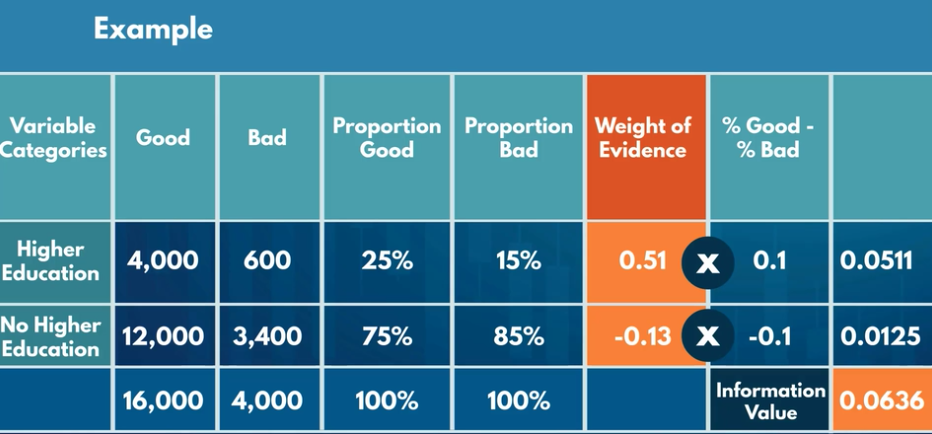

### Fitting the model
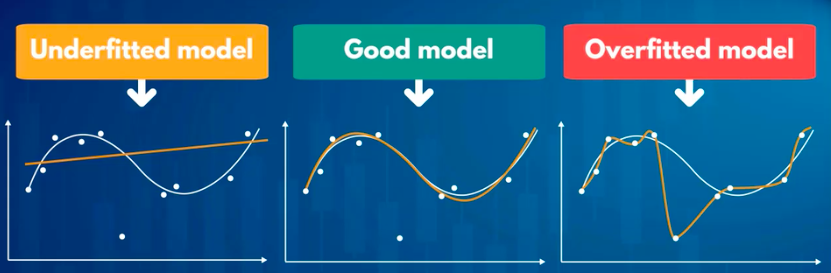

In [269]:
# split data
from sklearn.model_selection import train_test_split

In [270]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_target_train,loan_data_target_test = train_test_split(loan_data.drop('good_bad', axis =1), loan_data['good_bad'],random_state = 42, test_size =0.2 )

###  Data Preparation

Run this part of th code twice to also get the test dataset processed

In [390]:
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_target_test

In [391]:
df_inputs_prepr['grade'].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

#### Preprocessing  A Disrete Variable
Only extract *grade* variable and dependent variable *good_bad*:

In [392]:
df1 = pd.concat([df_inputs_prepr['grade'],df_targets_prepr], axis = 1)
df1.head()

,grade,good_bad
362514,C,1
288564,E,1
213591,C,1
263083,C,1
165001,A,1


In [393]:
df1_count = df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

In [394]:
df1_mean = df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()


In [395]:
df1 = pd.concat([df1_count,df1_mean],axis = 1)
df1.head()

,grade,good_bad,grade,good_bad
0,A,15108,A,0.962338
1,B,27199,B,0.923085
2,C,25048,C,0.882905
3,D,15390,D,0.844314
4,E,7145,E,0.805178


In [396]:
df1 = df1.iloc[:,[0,1,3]]
df1 

,grade,good_bad,good_bad
0,A,15108,0.962338
1,B,27199,0.923085
2,C,25048,0.882905
3,D,15390,0.844314
4,E,7145,0.805178
5,F,2699,0.775472
6,G,668,0.697605


In [397]:
df1.columns = [df1.columns.values[0],'n_obs','prop_good']
df1

,grade,n_obs,prop_good
0,A,15108,0.962338
1,B,27199,0.923085
2,C,25048,0.882905
3,D,15390,0.844314
4,E,7145,0.805178
5,F,2699,0.775472
6,G,668,0.697605


In [398]:
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,15108,0.962338,0.162004
1,B,27199,0.923085,0.291656
2,C,25048,0.882905,0.268591
3,D,15390,0.844314,0.165028
4,E,7145,0.805178,0.076616
5,F,2699,0.775472,0.028942
6,G,668,0.697605,0.007163


In [399]:
df1['n_good'] = df1['prop_good']*df1['n_obs']
df1['n_bad'] = df1['n_obs'] - df1['n_good']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,15108,0.962338,0.162004,14539.0,569.0
1,B,27199,0.923085,0.291656,25107.0,2092.0
2,C,25048,0.882905,0.268591,22115.0,2933.0
3,D,15390,0.844314,0.165028,12994.0,2396.0
4,E,7145,0.805178,0.076616,5753.0,1392.0
5,F,2699,0.775472,0.028942,2093.0,606.0
6,G,668,0.697605,0.007163,466.0,202.0


In [400]:
df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839
1,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299
2,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132
4,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605
5,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470
6,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823


In [401]:
df1['WoE'] =np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469
1,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785
2,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554
4,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261
5,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767
6,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323


In [402]:
df1 = df1.sort_values(['WoE'],ascending = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
6,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323
5,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767
4,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554
2,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010
1,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785
0,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469


In [403]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
6,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323,NaN,NaN
5,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767,0.077868,0.403556
4,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261,0.029706,0.179506
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554,0.039136,0.271707
2,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010,0.038590,0.329543
1,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785,0.040181,0.464796
0,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469,0.039252,0.755683


In [404]:
df1['IV'] = (df1['prop_n_good']- df1['prop_n_bad'])*df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
6,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323,NaN,NaN,0.300551
5,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767,0.077868,0.403556,0.300551
4,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261,0.029706,0.179506,0.300551
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554,0.039136,0.271707,0.300551
2,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010,0.038590,0.329543,0.300551
1,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785,0.040181,0.464796,0.300551
0,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469,0.039252,0.755683,0.300551


#### Preprocessing Discrete Variables: Automating Calculations

In [405]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    #create a new Dataframe with only the discrete_variable and dependent variable
    df = pd.concat([df_inputs_prepr[discrete_variable_name],df_targets_prepr], axis = 1)
    
    #count the occurance 
    df_count = df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count()
    df_mean = df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()
    
    #combine the two new dataframe 
    df = pd.concat([df_count,df_mean],axis = 1)
    df =  df.iloc[:,[0,1,3]]
    
    #probability of observation
    df['prop_n_obs'] = df.iloc[:,1]/df.iloc[:,1].sum()
    
    #number of good observation
    df['n_good'] = df.iloc[:,2]* df.iloc[:,1]
    
    #number of bad obesrvation
    df['n_bad'] =df.iloc[:,1] - df['n_good']
    
    #probability of good&bad observations
    df['prop_n_good'] = df['n_good']/df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad']/df['n_bad'].sum()
    
    #calculate WoE
    df['WoE'] =np.log(df['prop_n_good']/df['prop_n_bad'])
    
    #sort by WoE
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    
    df['IV'] = (df['prop_n_good']- df['prop_n_bad'])* df['WoE']
    df['IV'] = df['IV'].sum()
    
    return df

In [406]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr )
df_temp

,grade,good_bad,good_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323,0.300551
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767,0.300551
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261,0.300551
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554,0.300551
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010,0.300551
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785,0.300551
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469,0.300551


#### Preprocessing Discrete Variables: Visualizing Results

In [407]:
#import libaries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [408]:
def plot_by_woe(df_WoE,rotation_x = 0):
    #turn first column into strings
    x = np.array(df_WoE.iloc[:,0].apply(str))
    y = df_WoE['WoE'] 
    
    plt.figure(figsize = (18,6))
    plt.plot(x,y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by' +df_WoE.columns[0]))
    plt.xticks(rotation = rotation_x)
    

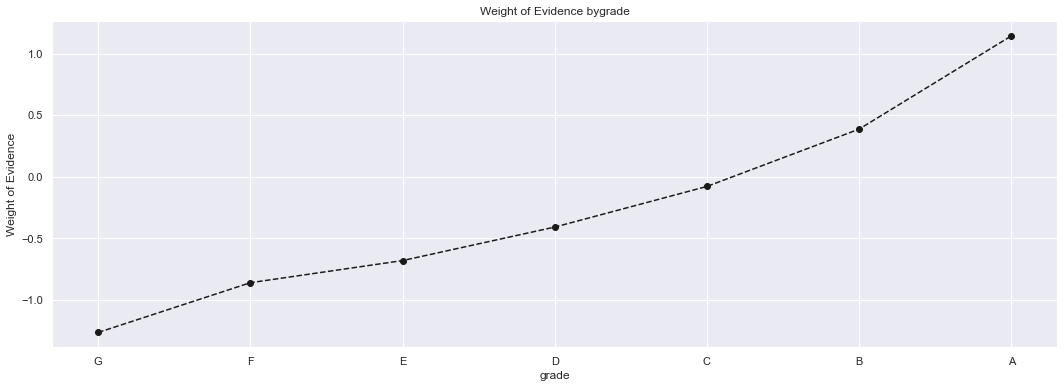

In [409]:
plot_by_woe(df_temp)

#### Preprocessing Discrete Variables: Creating Dummy Variables
home_ownership

In [410]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,good_bad,good_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,OTHER,45,0.777778,0.000483,35.0,10.0,0.000421,0.000981,-0.845478,0.022938
1,NONE,10,0.800000,0.000107,8.0,2.0,0.000096,0.000196,-0.711946,0.022938
2,RENT,37874,0.874003,0.406125,33102.0,4772.0,0.398498,0.468302,-0.161412,0.022938
3,OWN,8409,0.888572,0.090170,7472.0,937.0,0.089951,0.091953,-0.022006,0.022938
4,MORTGAGE,46919,0.904751,0.503115,42450.0,4469.0,0.511033,0.438567,0.152922,0.022938


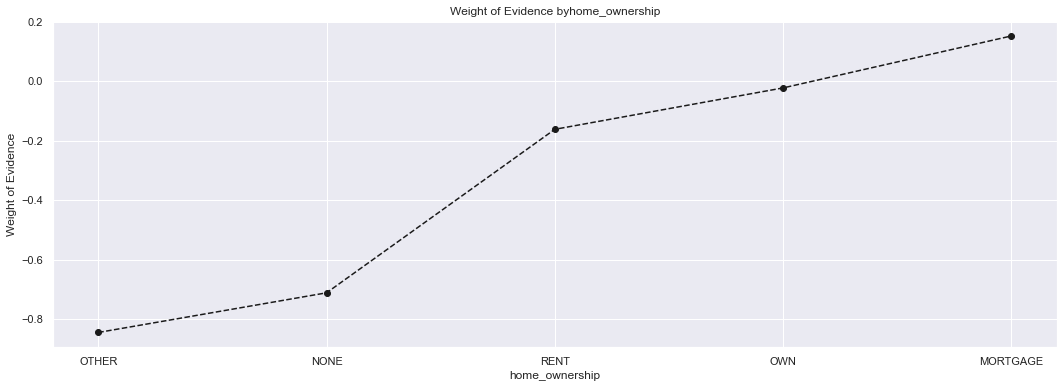

In [411]:
plot_by_woe(df_temp)

In [412]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership_RENT'],df_inputs_prepr['home_ownership_OTHER'],df_inputs_prepr['home_ownership_NONE'],df_inputs_prepr['home_ownership_ANY']])

#### addr_state

In [413]:
df_inputs_prepr['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [414]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,addr_state,good_bad,good_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,NE,1,0.000000,0.000011,0.0,1.0,0.000000,0.000098,-inf,inf
1,ID,2,0.500000,0.000021,1.0,1.0,0.000012,0.000098,-2.098241,inf
2,NV,1298,0.855932,0.013919,1111.0,187.0,0.013375,0.018351,-0.316333,inf
3,HI,486,0.860082,0.005211,418.0,68.0,0.005032,0.006673,-0.282267,inf
4,FL,6426,0.870059,0.068906,5591.0,835.0,0.067307,0.081943,-0.196759,inf
5,AL,1182,0.873096,0.012675,1032.0,150.0,0.012424,0.014720,-0.169622,inf
6,NJ,3676,0.875408,0.039418,3218.0,458.0,0.038740,0.044946,-0.148595,inf
7,LA,1130,0.876106,0.012117,990.0,140.0,0.011918,0.013739,-0.142178,inf
8,NY,8031,0.879965,0.086117,7067.0,964.0,0.085076,0.094603,-0.106141,inf
9,RI,403,0.880893,0.004321,355.0,48.0,0.004274,0.004711,-0.097324,inf


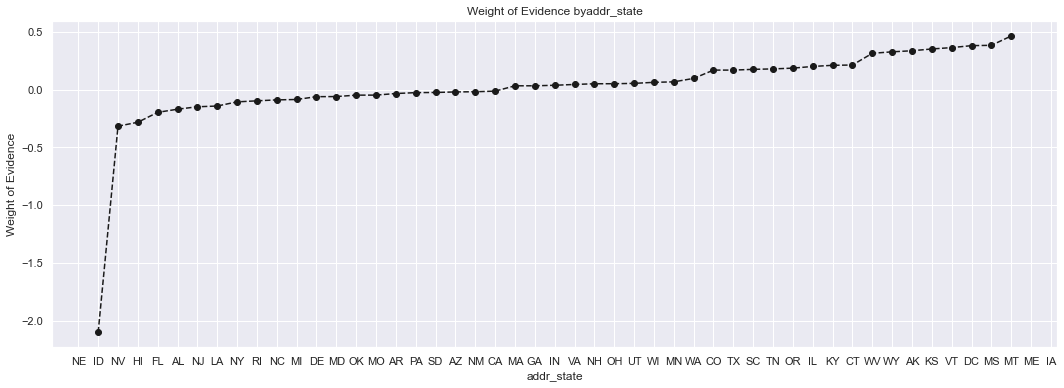

In [415]:
plot_by_woe(df_temp)

In [416]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

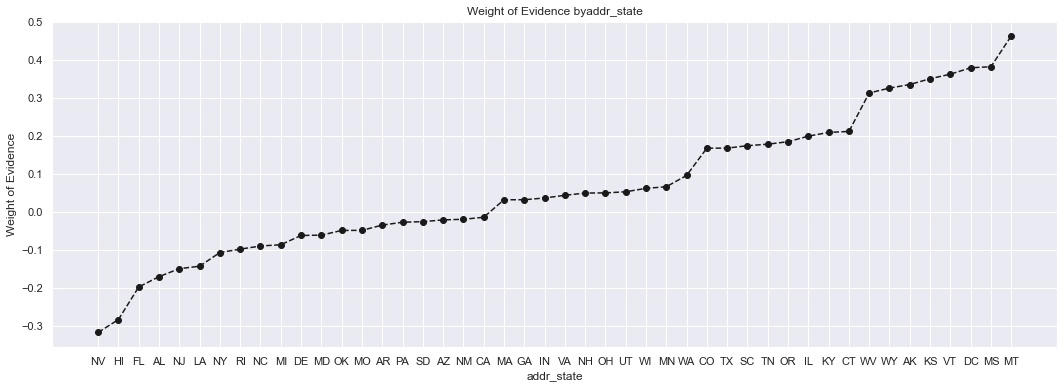

In [417]:
plot_by_woe(df_temp.iloc[2:-2, :])

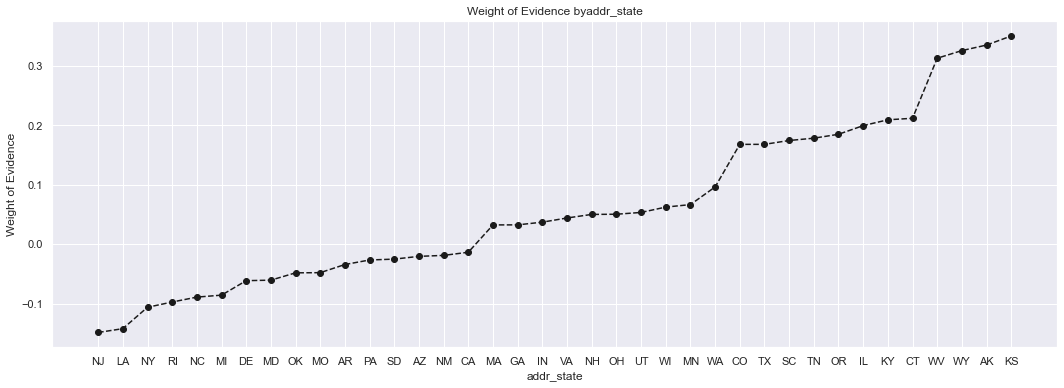

In [418]:
plot_by_woe(df_temp.iloc[6:-6, :])

Classify the states into groups according to number of observations and information value:

In [419]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state_MD'],
                                                          df_inputs_prepr['addr_state_NE'],
                                                         df_inputs_prepr['addr_state_IA'],
                                                         df_inputs_prepr['addr_state_NV'],
                                                         df_inputs_prepr['addr_state_FL'],
                                                         df_inputs_prepr['addr_state_HI'],
                                                         df_inputs_prepr['addr_state_AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state_NM'],df_inputs_prepr['addr_state_VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state_OK'],
                                                      df_inputs_prepr['addr_state_TN'],
                                                      df_inputs_prepr['addr_state_MO'],
                                                      df_inputs_prepr['addr_state_LA'],
                                                      df_inputs_prepr['addr_state_MD'],
                                                      df_inputs_prepr['addr_state_NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state_UT'],
                                               df_inputs_prepr['addr_state_KY'],
                                               df_inputs_prepr['addr_state_AZ'],
                                               df_inputs_prepr['addr_state_NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state_AR'],
                                                   df_inputs_prepr['addr_state_MI'],
                                                   df_inputs_prepr['addr_state_PA'],
                                                   df_inputs_prepr['addr_state_OH'],
                                                   df_inputs_prepr['addr_state_MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state_RI'],
                                                   df_inputs_prepr['addr_state_MA'],
                                                   df_inputs_prepr['addr_state_DE'],
                                                   df_inputs_prepr['addr_state_SD'],
                                                   df_inputs_prepr['addr_state_IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state_GA'],
                                             df_inputs_prepr['addr_state_WA'],
                                             df_inputs_prepr['addr_state_OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state_WI'],
                                          df_inputs_prepr['addr_state_MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state_IL'],
                                          df_inputs_prepr['addr_state_CT']])

df_inputs_prepr['addr_state: KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state_KS'],
                                                       df_inputs_prepr['addr_state_SC'],
                                                       df_inputs_prepr['addr_state_CO'],
                                                       df_inputs_prepr['addr_state_VT'],
                                                       df_inputs_prepr['addr_state_AK'],
                                                       df_inputs_prepr['addr_state_MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state_WV'],
                                                      df_inputs_prepr['addr_state_NH'],
                                                      df_inputs_prepr['addr_state_WY'],
                                                      df_inputs_prepr['addr_state_DC'],
                                                      df_inputs_prepr['addr_state_ME'],
                                                      df_inputs_prepr['addr_state_ID']])

#### verificaion_status

In [420]:
df_inputs_prepr['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [421]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,good_bad,good_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,Verified,33641,0.872031,0.360734,29336.0,4305.0,0.353161,0.422473,-0.179202,0.022684
1,Source Verified,29963,0.895738,0.321295,26839.0,3124.0,0.323101,0.306575,0.052501,0.022684
2,Not Verified,29653,0.906890,0.317971,26892.0,2761.0,0.323739,0.270952,0.177995,0.022684


In [422]:
df_inputs_prepr['verification_status:Verified'] = sum([df_inputs_prepr['verification_status_Verified'],
                                                      df_inputs_prepr['verification_status_Source Verified']])

In [423]:
df_inputs_prepr.rename(columns ={'verification_status_Not Verified':'verification_status: Not Verified'},inplace = True)

#### purpose

In [424]:
df_inputs_prepr['purpose'].unique()

array(['home_improvement', 'credit_card', 'debt_consolidation',
       'vacation', 'house', 'medical', 'small_business', 'car', 'other',
       'major_purchase', 'wedding', 'moving', 'educational',
       'renewable_energy'], dtype=object)

In [425]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,good_bad,good_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,educational,89,0.752809,0.000954,67.0,22.0,0.000807,0.002159,-0.984590,0.045124
1,renewable_energy,70,0.771429,0.000751,54.0,16.0,0.000650,0.001570,-0.881845,0.045124
2,small_business,1431,0.777079,0.015345,1112.0,319.0,0.013387,0.031305,-0.849516,0.045124
3,medical,918,0.857298,0.009844,787.0,131.0,0.009474,0.012856,-0.305210,0.045124
4,house,439,0.858770,0.004707,377.0,62.0,0.004539,0.006084,-0.293130,0.045124
5,other,4806,0.861007,0.051535,4138.0,668.0,0.049815,0.065554,-0.274561,0.045124
6,wedding,456,0.864035,0.004890,394.0,62.0,0.004743,0.006084,-0.249024,0.045124
7,moving,602,0.878738,0.006455,529.0,73.0,0.006368,0.007164,-0.117712,0.045124
8,vacation,496,0.881048,0.005319,437.0,59.0,0.005261,0.005790,-0.095845,0.045124
9,debt_consolidation,55012,0.885916,0.589897,48736.0,6276.0,0.586707,0.615898,-0.048556,0.045124


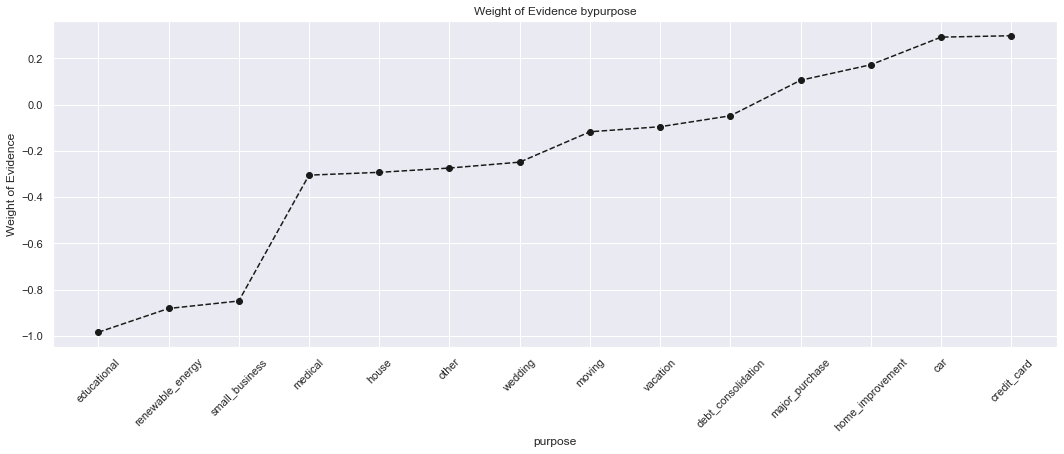

In [426]:
plot_by_woe(df_temp, 45)

In [427]:
df_inputs_prepr['purpose:edu_sm_b_wedd_ren_en_mov_house']=sum([df_inputs_prepr['purpose_educational'], df_inputs_prepr['purpose_small_business'],
                                                                 df_inputs_prepr['purpose_wedding'], df_inputs_prepr['purpose_renewable_energy'],
                                                                 df_inputs_prepr['purpose_moving'], df_inputs_prepr['purpose_house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose_other'], df_inputs_prepr['purpose_medical'],
                                             df_inputs_prepr['purpose_vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose_major_purchase'], df_inputs_prepr['purpose_car'],
                                                        df_inputs_prepr['purpose_home_improvement']])

#### initial_list_status

In [428]:
df_inputs_prepr['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [429]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,good_bad,good_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,f,60491,0.879685,0.648648,53213.0,7278.0,0.640603,0.71423,-0.108794,0.024888
1,w,32766,0.911127,0.351352,29854.0,2912.0,0.359397,0.28577,0.229238,0.024888


### Continuous Variables

define a function to calculate WoE of continuous Variable

In [430]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    #create a new Dataframe with only the discrete_variable and dependent variable
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df], axis = 1)
    
    #count the occurance 
    df_count = df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count()
    df_mean = df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()
    
    #combine the two new dataframe 
    df = pd.concat([df_count,df_mean],axis = 1)
    df =  df.iloc[:,[0,1,3]]
    
    #probability of observation
    df['prop_n_obs'] = df.iloc[:,1]/df.iloc[:,1].sum()
    
    #number of good observation
    df['n_good'] = df.iloc[:,2]* df.iloc[:,1]
    
    #number of bad obesrvation
    df['n_bad'] =df.iloc[:,1] - df['n_good']
    
    #probability of good&bad observations
    df['prop_n_good'] = df['n_good']/df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad']/df['n_bad'].sum()
    
    #calculate WoE
    df['WoE'] =np.log(df['prop_n_good']/df['prop_n_bad'])

    df['IV'] = (df['prop_n_good']- df['prop_n_bad'])* df['WoE']
    df['IV'] = df['IV'].sum()
    
    return df

#### term_int

In [431]:
df_inputs_prepr['term_int'].unique()

array([60, 36])

In [432]:
df_temp = woe_ordered_continuous(df_inputs_prepr,'term_int',df_targets_prepr)
df_temp

,term_int,good_bad,good_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,36,67534,0.902597,0.724171,60956.0,6578.0,0.733817,0.645535,0.128181,0.036603
1,60,25723,0.859581,0.275829,22111.0,3612.0,0.266183,0.354465,-0.286427,0.036603


In [433]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int']==36),1,0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int']==60),1,0)

#### emp_length_int

In [434]:
df_inputs_prepr['emp_length_int'].unique()

array([ 1., 10.,  2.,  9.,  0.,  3.,  6.,  4.,  7.,  8.,  5.])

In [435]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,emp_length_int,good_bad,good_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0.0,4200,0.864048,0.045037,3629.0,571.0,0.043688,0.056035,-0.248917,0.007917
1,1.0,13321,0.885894,0.142842,11801.0,1520.0,0.142066,0.149166,-0.048767,0.007917
2,2.0,8295,0.887402,0.088948,7361.0,934.0,0.088615,0.091658,-0.033766,0.007917
3,3.0,7391,0.889325,0.079254,6573.0,818.0,0.079129,0.080275,-0.014377,0.007917
4,4.0,5555,0.889469,0.059567,4941.0,614.0,0.059482,0.060255,-0.012913,0.007917
5,5.0,6172,0.886261,0.066183,5470.0,702.0,0.065850,0.068891,-0.045140,0.007917
6,6.0,5225,0.878852,0.056028,4592.0,633.0,0.055281,0.062120,-0.116640,0.007917
7,7.0,5131,0.893588,0.055020,4585.0,546.0,0.055196,0.053582,0.029686,0.007917
8,8.0,4542,0.890137,0.048704,4043.0,499.0,0.048672,0.048970,-0.006104,0.007917
9,9.0,3621,0.892847,0.038828,3233.0,388.0,0.038920,0.038077,0.021920,0.007917


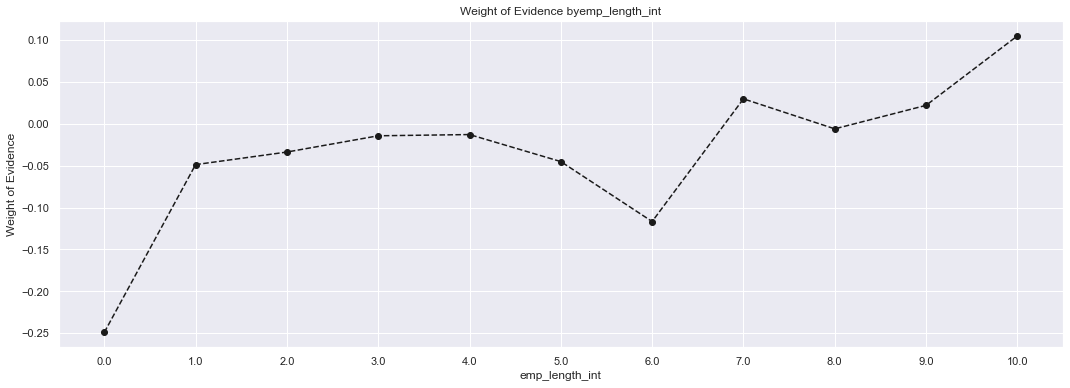

In [436]:
plot_by_woe(df_temp)

categorise by WoE: 1/1/2-4/5-6/7-9/10:

In [437]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5-7)),1,0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7-10)),1,0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0) 
                        

#### mth_since_issue_d

In [438]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 41.,  38.,  66.,  37.,  58.,  50.,  86.,  51.,  48.,  59.,  72.,
        77.,  47.,  46.,  56.,  55., 119.,  63., 102.,  39.,  53.,  40.,
        52.,  43.,  49.,  57.,  45.,  36.,  54.,  74.,  44.,  73., 103.,
        70.,  95.,  89.,  68.,  82.,  71.,  76., 104.,  65.,  80.,  91.,
        75.,  67.,  42.,  61.,  64.,  60.,  85.,  88., 110.,  96.,  78.,
        83.,  69.,  90.,  62., 108.,  79.,  92., 118.,  99.,  81., 115.,
        97., 114., 116., 100.,  93., 117., 106., 124., 101., 125.,  87.,
        84.,  94., 105., 109.,  98., 107., 112., 113., 122., 111., 120.,
       121., 123., 126.])

In [439]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

In [440]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp

,mths_since_issue_d_factor,good_bad,good_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(35.91, 37.8]",7191,0.945766,0.077109,6801.0,390.0,0.081874,0.038273,0.760438,0.126297
1,"(37.8, 39.6]",9752,0.930373,0.104571,9073.0,679.0,0.109225,0.066634,0.494196,0.126297
2,"(39.6, 41.4]",9506,0.919945,0.101933,8745.0,761.0,0.105276,0.074681,0.343363,0.126297
3,"(41.4, 43.2]",7240,0.909116,0.077635,6582.0,658.0,0.079237,0.064573,0.204648,0.126297
4,"(43.2, 45.0]",7217,0.902868,0.077388,6516.0,701.0,0.078443,0.068793,0.131267,0.126297
5,"(45.0, 46.8]",3104,0.895296,0.033284,2779.0,325.0,0.033455,0.031894,0.047781,0.126297
6,"(46.8, 48.6]",6197,0.890269,0.066451,5517.0,680.0,0.066416,0.066732,-0.004744,0.126297
7,"(48.6, 50.4]",5821,0.885930,0.062419,5157.0,664.0,0.062082,0.065162,-0.048413,0.126297
8,"(50.4, 52.2]",5021,0.878909,0.053840,4413.0,608.0,0.053126,0.059666,-0.116106,0.126297
9,"(52.2, 54.0]",4497,0.874138,0.048222,3931.0,566.0,0.047323,0.055545,-0.160186,0.126297


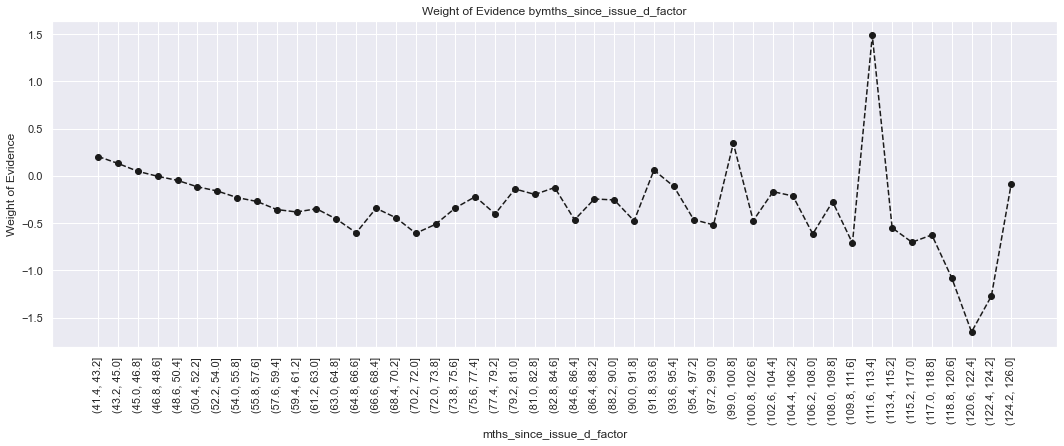

In [441]:
plot_by_woe(df_temp.iloc[3:,:], 90)

In [442]:
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

#### int_rate_factor

In [443]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [444]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

,int_rate_factor,good_bad,good_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(5.399, 5.833]",198,0.969697,0.002123,192.0,6.0,0.002311,0.000589,1.367495,0.371465
1,"(5.833, 6.246]",2086,0.979866,0.022368,2044.0,42.0,0.024607,0.004122,1.786754,0.371465
2,"(6.246, 6.658]",1974,0.972138,0.021167,1919.0,55.0,0.023102,0.005397,1.453986,0.371465
3,"(6.658, 7.071]",477,0.951782,0.005115,454.0,23.0,0.005465,0.002257,0.884362,0.371465
4,"(7.071, 7.484]",804,0.981343,0.008621,789.0,15.0,0.009498,0.001472,1.864475,0.371465
5,"(7.484, 7.897]",3245,0.965485,0.034796,3133.0,112.0,0.037717,0.010991,1.233007,0.371465
6,"(7.897, 8.31]",2429,0.951009,0.026046,2310.0,119.0,0.027809,0.011678,0.867639,0.371465
7,"(8.31, 8.722]",1680,0.965476,0.018015,1622.0,58.0,0.019526,0.005692,1.232732,0.371465
8,"(8.722, 9.135]",2384,0.942114,0.025564,2246.0,138.0,0.027038,0.013543,0.691412,0.371465
9,"(9.135, 9.548]",1590,0.976730,0.017050,1553.0,37.0,0.018696,0.003631,1.638785,0.371465


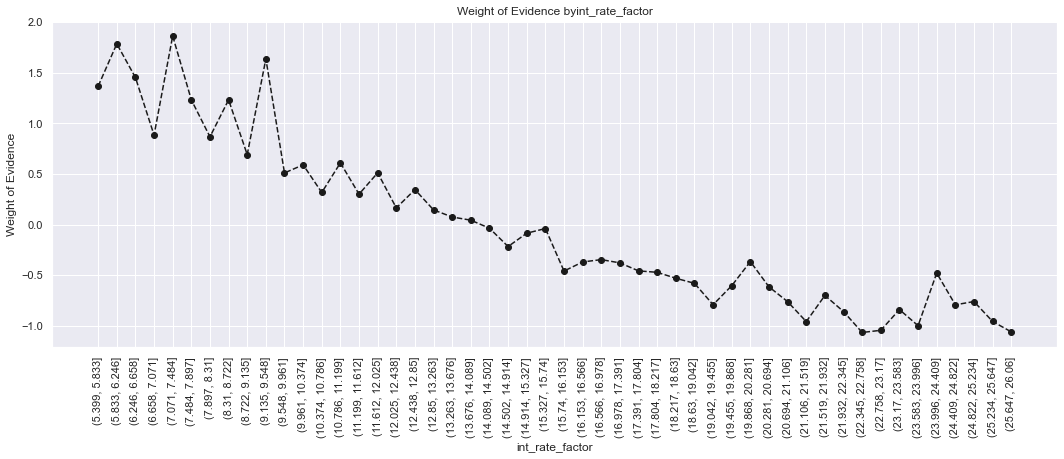

In [445]:
plot_by_woe(df_temp,90)

In [446]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

#### mths_since_earliest_cr_line

In [447]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_earliest_cr_line'], 50)

In [448]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

,mths_since_earliest_cr_line_factor,good_bad,good_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(72.269, 87.62]",402,0.932836,0.004311,375.0,27.0,0.004515,0.002650,0.532909,inf
1,"(87.62, 102.24]",812,0.869458,0.008708,706.0,106.0,0.008500,0.010402,-0.202004,inf
2,"(102.24, 116.86]",1324,0.857251,0.014198,1135.0,189.0,0.013664,0.018548,-0.305540,inf
3,"(116.86, 131.48]",2876,0.867524,0.030841,2495.0,381.0,0.030038,0.037390,-0.218936,inf
4,"(131.48, 146.1]",3993,0.870023,0.042819,3474.0,519.0,0.041824,0.050932,-0.197022,inf
5,"(146.1, 160.72]",4470,0.887248,0.047935,3966.0,504.0,0.047747,0.049460,-0.035243,inf
6,"(160.72, 175.34]",5776,0.885388,0.061940,5114.0,662.0,0.061568,0.064966,-0.053709,inf
7,"(175.34, 189.96]",6339,0.888468,0.067977,5632.0,707.0,0.067805,0.069382,-0.022991,inf
8,"(189.96, 204.58]",8376,0.883954,0.089821,7404.0,972.0,0.089138,0.095388,-0.067761,inf
9,"(204.58, 219.2]",9115,0.891059,0.097746,8122.0,993.0,0.097782,0.097448,0.003421,inf


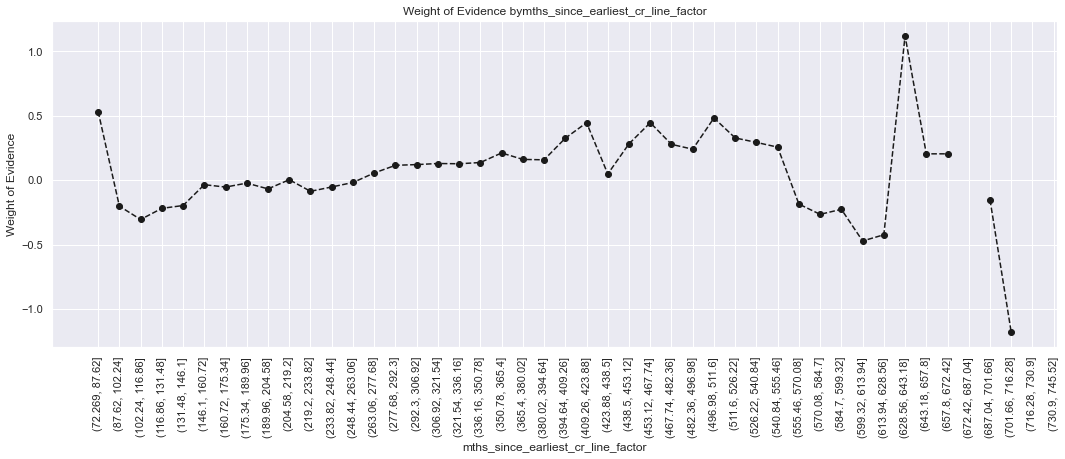

In [449]:
plot_by_woe(df_temp,90)

#### annual_inc_factor

In [450]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp

,annual_inc_factor,good_bad,good_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(-2695.2, 79752.0]",62621,0.877932,0.671488,54977.0,7644.0,0.661839,0.750147,-0.125247,inf
1,"(79752.0, 154704.0]",26582,0.915206,0.285040,24328.0,2254.0,0.292872,0.221197,0.280681,inf
2,"(154704.0, 229656.0]",2916,0.926269,0.031268,2701.0,215.0,0.032516,0.021099,0.432499,inf
3,"(229656.0, 304608.0]",710,0.928169,0.007613,659.0,51.0,0.007933,0.005005,0.460657,inf
4,"(304608.0, 379560.0]",171,0.929825,0.001834,159.0,12.0,0.001914,0.001178,0.485757,inf
5,"(379560.0, 454512.0]",111,0.927928,0.001190,103.0,8.0,0.001240,0.000785,0.457047,inf
6,"(454512.0, 529464.0]",53,0.962264,0.000568,51.0,2.0,0.000614,0.000196,1.140438,inf
7,"(529464.0, 604416.0]",33,0.969697,0.000354,32.0,1.0,0.000385,0.000098,1.367495,inf
8,"(604416.0, 679368.0]",10,1.000000,0.000107,10.0,0.0,0.000120,0.000000,inf,inf
9,"(679368.0, 754320.0]",13,0.923077,0.000139,12.0,1.0,0.000144,0.000098,0.386666,inf


In [451]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000,:]

In [452]:
pd.options.mode.chained_assignment = None
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)

In [453]:
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor',
                                df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

,annual_inc_factor,good_bad,good_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(4664.8, 7504.0]",10,1.000000,0.000114,10.0,0.0,0.000128,0.000000,inf,inf
1,"(7504.0, 10208.0]",84,0.761905,0.000958,64.0,20.0,0.000822,0.002043,-0.911157,inf
2,"(10208.0, 12912.0]",123,0.780488,0.001403,96.0,27.0,0.001232,0.002758,-0.805796,inf
3,"(12912.0, 15616.0]",304,0.851974,0.003467,259.0,45.0,0.003325,0.004597,-0.324142,inf
4,"(15616.0, 18320.0]",383,0.827676,0.004368,317.0,66.0,0.004069,0.006743,-0.505060,inf
5,"(18320.0, 21024.0]",733,0.840382,0.008359,616.0,117.0,0.007907,0.011953,-0.413234,inf
6,"(21024.0, 23728.0]",704,0.846591,0.008028,596.0,108.0,0.007651,0.011034,-0.366198,inf
7,"(23728.0, 26432.0]",1785,0.861064,0.020356,1537.0,248.0,0.019730,0.025337,-0.250148,inf
8,"(26432.0, 29136.0]",1355,0.853137,0.015452,1156.0,199.0,0.014839,0.020331,-0.314891,inf
9,"(29136.0, 31840.0]",2292,0.854276,0.026137,1958.0,334.0,0.025134,0.034123,-0.305769,inf


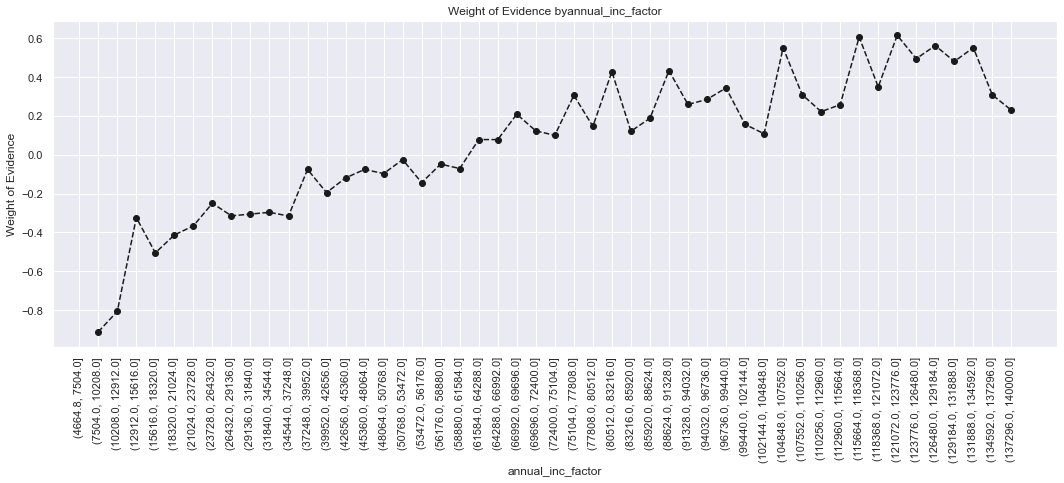

In [454]:
plot_by_woe(df_temp, 90)

In [455]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc']<= 200000),1,0)

df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc']> 200000)&(df_inputs_prepr['annual_inc']<= 300000),1,0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc']> 300000)&(df_inputs_prepr['annual_inc']<= 400000),1,0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc']> 400000)&(df_inputs_prepr['annual_inc']<= 500000),1,0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc']> 500000)&(df_inputs_prepr['annual_inc']<= 600000),1,0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc']> 600000)&(df_inputs_prepr['annual_inc']<= 700000),1,0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc']> 700000)&(df_inputs_prepr['annual_inc']<= 800000),1,0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc']> 800000)&(df_inputs_prepr['annual_inc']<= 900000),1,0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc']> 900000)&(df_inputs_prepr['annual_inc']<= 1000000),1,0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc']> 1000000)&(df_inputs_prepr['annual_inc']<= 1200000),1,0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc']> 1200000)&(df_inputs_prepr['annual_inc']<= 1400000),1,0)

df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc']> 1400000),1,0)

 #### 

In [456]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', 
                                df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

,mths_since_last_delinq_factor,good_bad,good_bad,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(-0.17, 3.4]",1348,0.868694,0.031283,1171.0,177.0,0.030501,0.037668,-0.211036,inf
1,"(3.4, 6.8]",1890,0.880423,0.043861,1664.0,226.0,0.043342,0.048095,-0.104055,inf
2,"(6.8, 10.2]",3373,0.887044,0.078276,2992.0,381.0,0.077933,0.081081,-0.039601,inf
3,"(10.2, 13.6]",2496,0.895833,0.057924,2236.0,260.0,0.058241,0.055331,0.051263,inf
4,"(13.6, 17.0]",3165,0.884044,0.073449,2798.0,367.0,0.072880,0.078102,-0.069201,inf
5,"(17.0, 20.4]",2282,0.893076,0.052958,2038.0,244.0,0.053084,0.051926,0.022057,inf
6,"(20.4, 23.8]",2115,0.898345,0.049082,1900.0,215.0,0.049489,0.045754,0.078472,inf
7,"(23.8, 27.2]",2755,0.895463,0.063934,2467.0,288.0,0.064258,0.061290,0.047298,inf
8,"(27.2, 30.6]",1929,0.896319,0.044766,1729.0,200.0,0.045035,0.042562,0.056482,inf
9,"(30.6, 34.0]",2453,0.891969,0.056926,2188.0,265.0,0.056991,0.056395,0.010514,inf


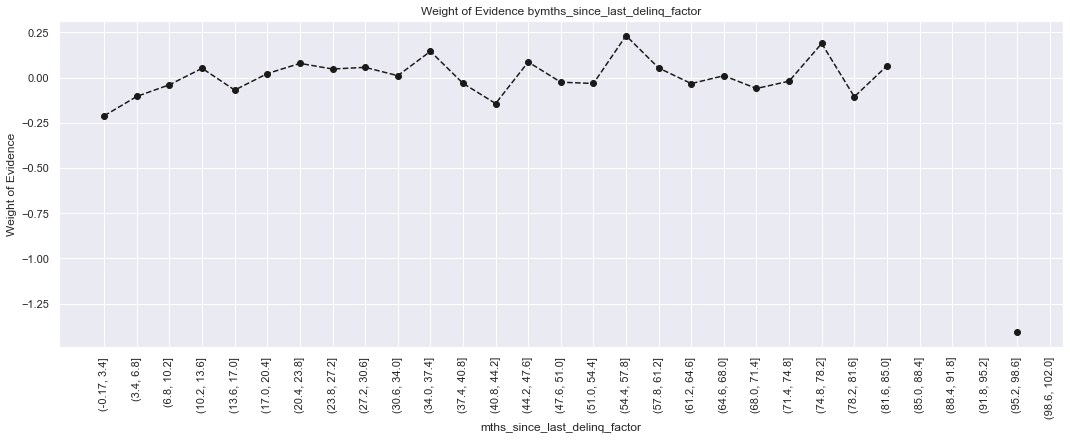

In [457]:
plot_by_woe(df_temp,90)

In [458]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()),1,0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=0) &(df_inputs_prepr['mths_since_last_delinq']<=3),1,0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=4) &(df_inputs_prepr['mths_since_last_delinq']<=30),1,0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=31) &(df_inputs_prepr['mths_since_last_delinq']<=56),1,0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=57),1,0)

### Preprocessing the Test Dataset

In [459]:
#loan_data_inputs_train = df_inputs_prepr
loan_data_inputs_test = df_inputs_prepr

In [461]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_target_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_target_test.to_csv('loan_data_targets_test.csv')